In [22]:
# Importation des bibliothèques principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fonctions de manipulation des données
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel


# Importation des métriques
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error

## VarianceTreshold

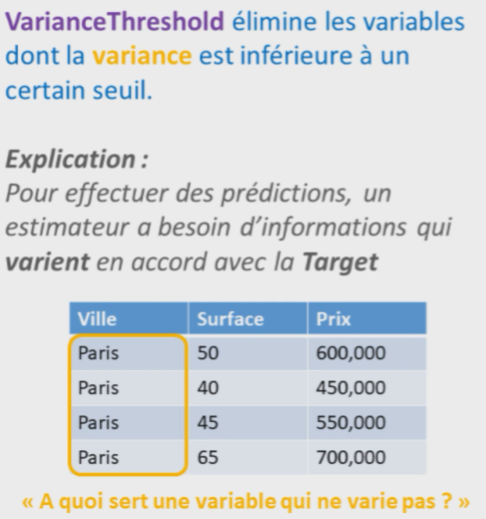
Si l'on effectue des calculs sur Paris, alors il est préférable de ne pas garder la colonne ville.

Illustration sur un dataset réel:
La sepal width ne varie presque pas, on peut donc la supprimer


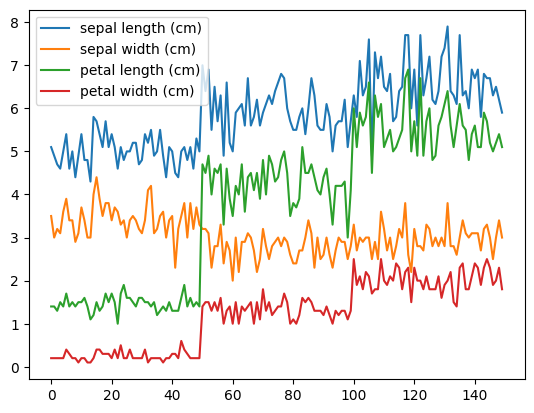

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [13]:
#Calcul la variance de chacune des variables
X.var(axis=0)

#Transformer qui va sélectionner les variables ayant une variance supérieure à 0.2
selector = VarianceThreshold(threshold=0.2)
# Appliquer le sélecteur de variance sur les données (on supprime la colonne sepal width<0.2 de var)
new_X = selector.fit_transform(X)
selector.get_support()
#On crée un tableau avec les noms et on sélectionne les variables
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## SelectKBest !!!
#### Fonctionne avec plusieurs transformers
Sélection de variables basé sur un test de dépendance

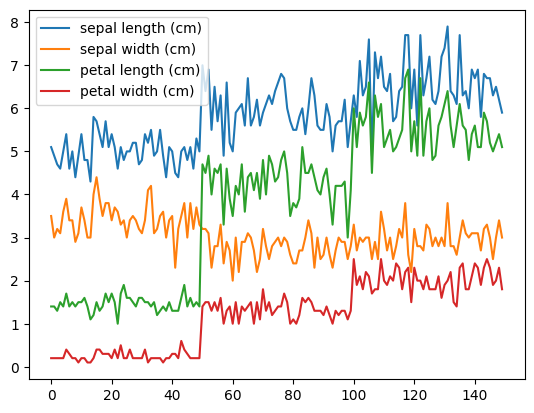

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [20]:
#On fait un test de chi2 pour sélectionner k=n colonnes avec la meilleure corrélation avec la variable cible
selector = SelectKBest(chi2, k=2)
#On remarque que l'on doit( faire passer X et y)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

## SelectFromModel

On préentraine un estimateur à partir de tout le dataset ensuite on examine ses coefficients pour voir quelles variables sont les plus importantes
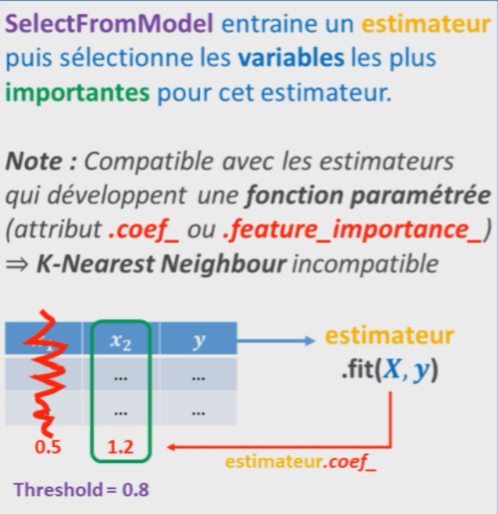

In [ ]:
selector = SelectFromModel(SGDClassifier(random_state=0), threshold="mean")
#on doit passer X et y parce que le modèle(SGDClassifier ^) a besoin de la variable cible pour s'entraîner
selector.fit_transform(X, y)
selector.get_support()

#Cherche les coefficients du modèle
#
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])